In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import LogNorm

In [98]:
# FILE PATHS

path_qber = r"\\server\groups\ding\PROJECTS\QKD_Perovskites\Graphs_QBER_Compensation\20251204\map_qber_20251204.txt"
# path_positions = r"\\server\groups\ding\PROJECTS\QKD_Perovskites\Graphs_QBER_Compensation\20251201\ProblemSolved\Positions_WPs_CoordinateDescent_20251101_1619.txt" # CoordDescent
path_positions = r"\\server\groups\ding\PROJECTS\QKD_Perovskites\Graphs_QBER_Compensation\20251201\ProblemSolved\Positions_WPs_RandomMinimizer_20251201_1513.txt" # Random Minimizer

In [99]:
# -------------------------------------------------------
# LOAD QBER MAP (angle_wp1, angle_wp2, qber)
# -------------------------------------------------------
df = pd.read_csv(path_qber, sep="\t")

# Convert the raw list into a 361×361 grid from –180 to 180
angles = np.arange(-180, 181)
qber_map = np.full((len(angles), len(angles)), np.nan)

for _, row in df.iterrows():
    i = int(row["angle_wp1"] + 180)
    j = int(row["angle_wp2"] + 180)
    qber_map[i, j] = row["qber"]

# Optional: flip vertically for correct orientation
# qber_map = np.flipud(qber_map)

In [100]:
# -------------------------------------------------------
# LOAD WAVEPLATE PATH
# -------------------------------------------------------
df_pos = pd.read_csv(path_positions, sep="\t")

path_wp1 = df_pos["pos_wp1"].values
path_wp2 = df_pos["pos_wp2"].values

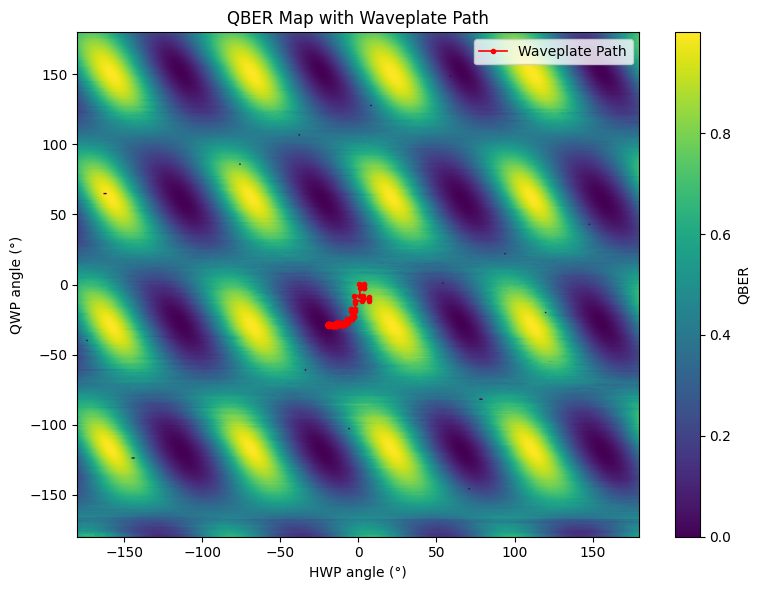

In [101]:
# -------------------------------------------------------
# PLOT
# -------------------------------------------------------
plt.figure(figsize=(8, 6))

# Heatmap
plt.imshow(
    qber_map,
    extent=[-180, 180, -180, 180],
    origin='lower',
    aspect='auto',
    cmap='viridis'
)

plt.colorbar(label="QBER")

# Overlay the path of the waveplates
plt.plot(path_wp1, path_wp2, color="red", marker="o", markersize=3, linewidth=1.2, label="Waveplate Path")

plt.xlabel("HWP angle (°)")
plt.ylabel("QWP angle (°)")
plt.title("QBER Map with Waveplate Path")
plt.legend()
plt.tight_layout()
plt.show()

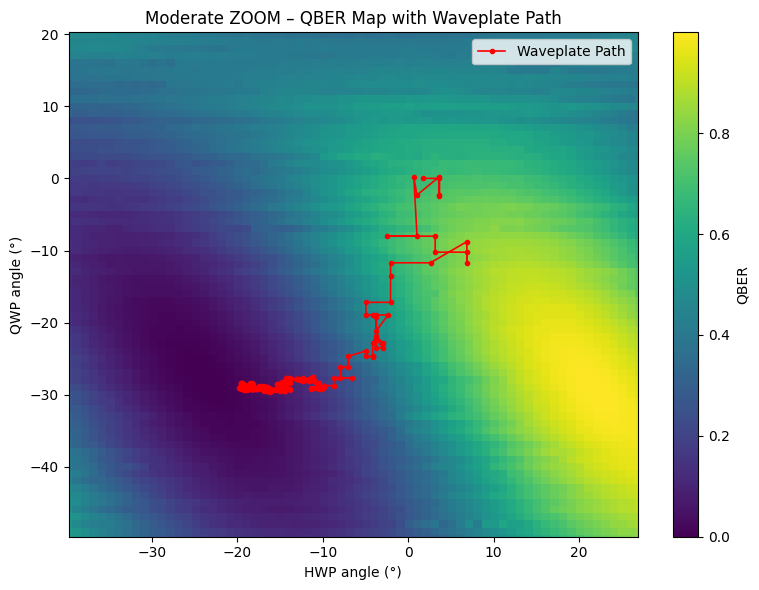

In [102]:
# -------------------------------------------------------
# MODERATE ZOOM PLOT AROUND THE WAVEPLATE PATH
# -------------------------------------------------------

# Larger margins for a softer zoom
margin_x = 20   # degrees of padding in X
margin_y = 20   # degrees of padding in Y

xmin = path_wp1.min() - margin_x
xmax = path_wp1.max() + margin_x
ymin = path_wp2.min() - margin_y
ymax = path_wp2.max() + margin_y

plt.figure(figsize=(8, 6))

plt.imshow(
    qber_map,
    extent=[-180, 180, -180, 180],
    origin='lower',
    aspect='auto',
    cmap='viridis'
)

plt.colorbar(label="QBER")

# Overlay the path
plt.plot(path_wp1, path_wp2, color="red", marker="o",
         markersize=3, linewidth=1.2, label="Waveplate Path")

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.xlabel("HWP angle (°)")
plt.ylabel("QWP angle (°)")
plt.title("Moderate ZOOM – QBER Map with Waveplate Path")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\raul.lahoz.sanz\AppData\Local\Temp\ipykernel_5288\1010761782.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("spring")


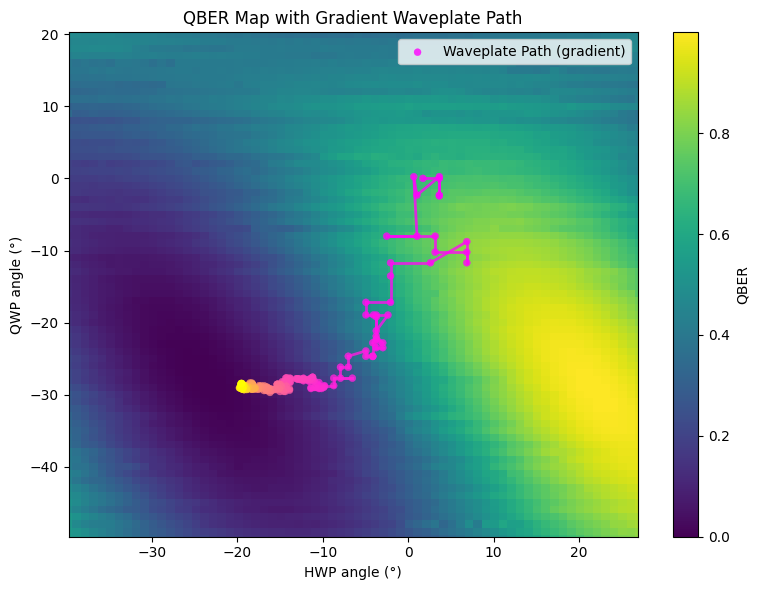

In [103]:
# -------------------------------------------------------
# MODERATE ZOOM PLOT AROUND THE WAVEPLATE PATH WITH GRADIENT
# -------------------------------------------------------

# Zoom margins
margin_x = 20
margin_y = 20

xmin = path_wp1.min() - margin_x
xmax = path_wp1.max() + margin_x
ymin = path_wp2.min() - margin_y
ymax = path_wp2.max() + margin_y

plt.figure(figsize=(8, 6))

# Heatmap
plt.imshow(
    qber_map,
    extent=[-180, 180, -180, 180],
    origin='lower',
    aspect='auto',
    cmap='viridis',
    zorder=0
)
plt.colorbar(label="QBER")

# Define colormap
colormap = cm.get_cmap("spring")

# Normalize indices for colormap
norm = colors.Normalize(vmin=0, vmax=len(path_wp1)-1)
cmap = colormap

# Draw gradient line
for i in range(len(path_wp1) - 1):
    plt.plot(
        [path_wp1[i], path_wp1[i+1]],
        [path_wp2[i], path_wp2[i+1]],
        color=cmap(norm(i)),
        linewidth=2,
        alpha=0.8,
        zorder=1
    )

# Draw gradient points
plt.scatter(
    path_wp1, path_wp2,
    c=np.arange(len(path_wp1)),
    cmap=colormap,
    s=25,
    linewidth=0.3,
    alpha=0.8,
    zorder=2,
    label="Waveplate Path (gradient)"
)

# Set zoom limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.xlabel("HWP angle (°)")
plt.ylabel("QWP angle (°)")
plt.title("QBER Map with Gradient Waveplate Path")
plt.legend()
plt.tight_layout()
plt.show()


### Now let's plot the QBER colormap in logarithmic scale.

This way it is easy for us find out of we have found the real minimum

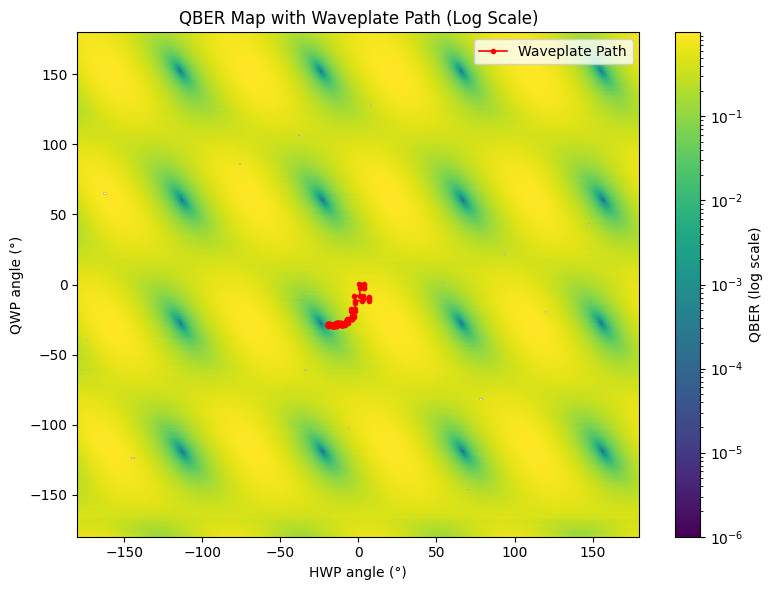

In [104]:
# -------------------------------------------------------
# PLOT WITH LOGARITHMIC COLOR SCALE
# -------------------------------------------------------
plt.figure(figsize=(8, 6))

# Heatmap with logarithmic scale
plt.imshow(
    qber_map,
    extent=[-180, 180, -180, 180],
    origin='lower',
    aspect='auto',
    cmap='viridis',
    norm=LogNorm(vmin=qber_map.min() + 1e-6, vmax=qber_map.max())  # avoid log(0)
)

plt.colorbar(label="QBER (log scale)")

# Overlay the path of the waveplates
plt.plot(
    path_wp1, path_wp2,
    color="red",
    marker="o",
    markersize=3,
    linewidth=1.2,
    label="Waveplate Path"
)

plt.xlabel("HWP angle (°)")
plt.ylabel("QWP angle (°)")
plt.title("QBER Map with Waveplate Path (Log Scale)")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\raul.lahoz.sanz\AppData\Local\Temp\ipykernel_5288\2341151402.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("spring")


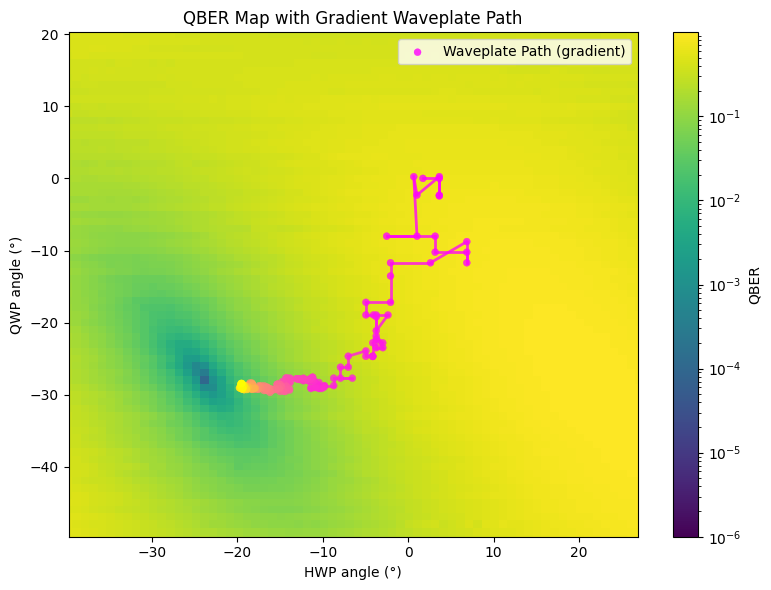

In [105]:
# -------------------------------------------------------
# MODERATE ZOOM PLOT AROUND THE WAVEPLATE PATH WITH GRADIENT
# -------------------------------------------------------

# Zoom margins
margin_x = 20
margin_y = 20

xmin = path_wp1.min() - margin_x
xmax = path_wp1.max() + margin_x
ymin = path_wp2.min() - margin_y
ymax = path_wp2.max() + margin_y

plt.figure(figsize=(8, 6))

# Heatmap
plt.imshow(
    qber_map,
    extent=[-180, 180, -180, 180],
    origin='lower',
    aspect='auto',
    cmap='viridis',
    norm=LogNorm(vmin=qber_map.min() + 1e-6, vmax=qber_map.max())  # avoid log(0)
)
plt.colorbar(label="QBER")

# Define colormap
colormap = cm.get_cmap("spring")

# Normalize indices for colormap
norm = colors.Normalize(vmin=0, vmax=len(path_wp1)-1)
cmap = colormap

# Draw gradient line
for i in range(len(path_wp1) - 1):
    plt.plot(
        [path_wp1[i], path_wp1[i+1]],
        [path_wp2[i], path_wp2[i+1]],
        color=cmap(norm(i)),
        linewidth=2,
        alpha=0.8,
        zorder=1
    )

# Draw gradient points
plt.scatter(
    path_wp1, path_wp2,
    c=np.arange(len(path_wp1)),
    cmap=colormap,
    s=25,
    linewidth=0.3,
    alpha=0.8,
    zorder=2,
    label="Waveplate Path (gradient)"
)

# Set zoom limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.xlabel("HWP angle (°)")
plt.ylabel("QWP angle (°)")
plt.title("QBER Map with Gradient Waveplate Path")
plt.legend()
plt.tight_layout()
plt.show()
